## Heatmap plot

A heatmap also deals with 2 dimensional data and cares about the relation.
Here instead of numerical data with dots, we are using categorical data where every combination of the 2 categories has a singular value.

This results into a matrix that we visualize where each index of the matrix has its own color based on a color gradient.
This plot got its name as it is used to find 'hot spots' between combinations of 2 categorical features.

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,12)})

To make optimal use of this plot, we are going to take on a rather complex dataset, where we have measurements of brain networks.
The idea is that we have several networks with several nodes in 2 hemispheres, the content of the data is not as important here, what matters is that we want to find correlations between different nodes in the brain.

In [2]:
brain_df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
brain_df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

luckily for us, the pandas library has an easy method of finding out what the correlation is between different columns of numerical data.
These correlations are denoted between -1 (completely opposite) to 1 (completely related).
Take a minute to understand how the columns and index changed using the operation, you can see that a node in a network and hemisphere has a correlation of 1.00 with itself.

In [3]:
brain_df.corr()

network                   1                   2                   3            \
node                      1                   1                   1             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh    1.000000  0.881516 -0.042699 -0.074437 -0.342849 -0.169498   
             rh    0.881516  1.000000  0.013073  0.033733 -0.351509 -0.162006   
2       1    lh   -0.042699  0.013073  1.000000  0.813394 -0.006940 -0.039375   
             rh   -0.074437  0.033733  0.813394  1.000000 -0.027324 -0.023608   
3       1    lh   -0.342849 -0.351509 -0.006940 -0.027324  1.000000  0.553183   
...                     ...       ...       ...       ...       ...       ...   
17      2    lh   -0.206379 -0.273370 -0.151724 -0.224447  0.026579 -0.056687   
             rh   -0.212601 -0.266456 -0.124508 -0.172704 -0.089109 -0.144020   
        3    lh   -0.142770 -0.174222 -0.179912 -0.250455 -0.012675 -0.047434   
             rh   -0.204326 -0.223572 -0.044706 -0.090798 -0.024644 -0.103875   
        4    lh   -0.219283 -0.273626 -0.209557 -0.216674  0.013747 -0.058838   

network                   4                   5            ...        16  \
node                      1                   1            ...         3   
hemi                     lh        rh        lh        rh  ...        rh   
network node hemi                                          ...             
1       1    lh   -0.373050 -0.361726  0.431619  0.418708  ... -0.106642   
             rh   -0.333244 -0.337476  0.431953  0.519916  ... -0.173530   
2       1    lh   -0.019773  0.007099 -0.147374 -0.104164  ... -0.215429   
             rh   -0.017577 -0.014632 -0.173501 -0.094717  ... -0.184458   
3       1    lh    0.528787  0.503403 -0.157154 -0.185008  ... -0.146451   
...                     ...       ...       ...       ...  ...       ...   
17      2    lh    0.020064  0.084837 -0.359879 -0.394522  ...  0.173117   
             rh    0.007278  0.029909 -0.299152 -0.295150  ...  0.299440   
        3    lh    0.070114  0.100063 -0.245179 -0.303354  ... -0.055529   
             rh    0.101791  0.128318 -0.302654 -0.277378  ...  0.079460   
        4    lh   -0.069100 -0.031653 -0.282767 -0.279381  ...  0.418857   

network                                      17                                \
node                      4                   1                   2             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh   -0.162254 -0.232501 -0.099781 -0.161649 -0.206379 -0.212601   
             rh   -0.224436 -0.277954 -0.212964 -0.262915 -0.273370 -0.266456   
2       1    lh   -0.239876 -0.093679 -0.240455 -0.190721 -0.151724 -0.124508   
             rh   -0.244956 -0.061151 -0.255101 -0.169402 -0.224447 -0.172704   
3       1    lh   -0.033931 -0.156972 -0.015964 -0.149944  0.026579 -0.089109   
...                     ...       ...       ...       ...       ...       ...   
17      2    lh    0.478606  0.258958  0.499351  0.319184  1.000000  0.597620   
             rh    0.204444  0.453497  0.272868  0.440901  0.597620  1.000000   
        3    lh    0.259191  0.046663  0.454838  0.188905  0.601382  0.345253   
             rh    0.005291  0.296318  0.087061  0.224760  0.319382  0.456019   
        4    lh    0.603491  0.172167  0.589364  0.451264  0.517481  0.256544   

network                                          
node                      3                   4  
hemi                     lh        rh        lh  
network node hemi                                
1       1    lh   -0.142770 -0.204326 -0.219283  
             rh   -0.174222 -0.223572 -0.273626  
2       1    lh   -0.179912 -0.044706 -0.209557  
             rh   -0.250455 -0.090798 -0.216674  
3       1    lh   -0.012675

This result is way to much to see a pattern, yet if we add a color scale and give each a gradation, we can see some correlations.

Can you see how nodes from the same network are related with a more whitish color?
The heatmap might be fairly intimidating at first but is a powerful tool when handling bigger datasets.

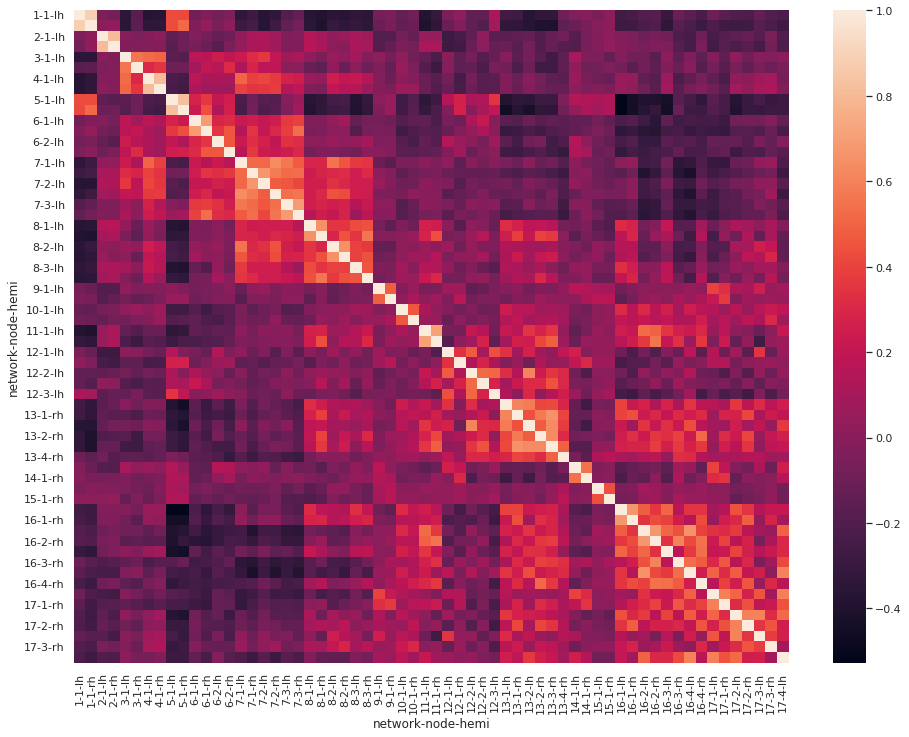

In [4]:
sns.heatmap(data=brain_df.corr())

Without going into the medical details we can also apply some machine learning to it and create a clustermap.
This map is a way to group nodes from similar networks into clusters, an advances technique!

Gaze over the colors and look at the axi, notice how the computer figured out how to group the most similar nodes from networks.
Also, I did not create this by myself, so don't give me credit for this!

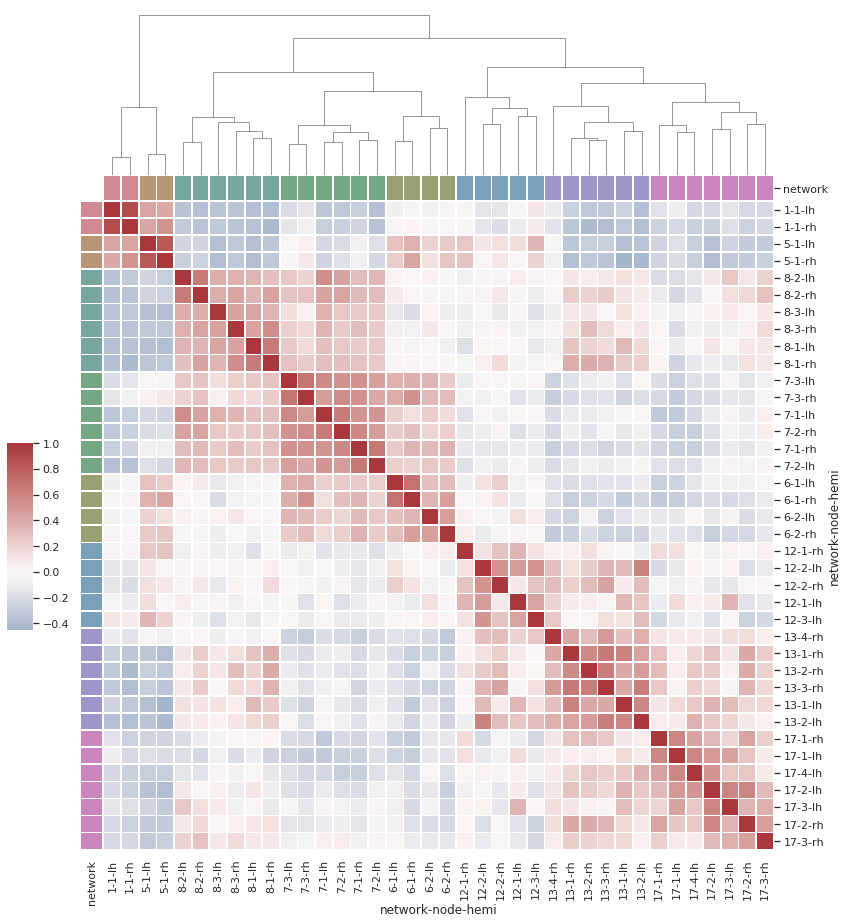

In [5]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (brain_df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
brain_df = brain_df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = brain_df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=brain_df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(brain_df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()